Рассмотрим принцип работы свертки на примере фильтра Собеля. Фильтр Собеля может быть горизонтальным и вертикальным. Этот тип записит от карты активации.
Горизонтальный фильтр Собеля выделяет из исходного изображения преимщуественно горизонтальные линии, заполняя их пиксели большими по модулями числами (остальные элементы силуэта изображения будут иметь меньшие значения). Вертикальный же, наоборот, вертикальные.

Реализация простого фильтра Собеля 5Х5:

In [11]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def sobel_filter(img, mode='vertical'):

  width, height, c = img.shape # ширина, длина, каналы цвета

  # Переведем цветное изображение в черно-белое:

  if c > 1:
    img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]

  # Фильтр Собеля:

  vertical = np.array([[-1, -2, 0, 2, 1],
                   [-4, -8, 0, 8, 4],
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float64)
  horizontal = np.array([[1, 4, 6, 4, 1],
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0],
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float64)

  # Применение карты активации фильтра Собеля на изображение:

  TYPE = {'horizontal' : horizontal, 'vertical' : vertical}

  """
  Изначально фильтр накладывается на левый верхний угол, далее сумируется
  покоординатное произведение значения пикселя изображения и соответсвующее
  значение фильтра. Процесс повторяется для следующий возможных наложений.
  Таким образом, размер выходного изображения, если размер исходного
  image.shape[0] Х image.shape[0], равен image.shape[0] - filter.shape[0] + 1
  """

  gx = signal.convolve2d(img, TYPE[mode], mode='same', boundary = 'symm', fillvalue=0)
  gx = np.sqrt(gx * gx)

  return gx * 255.0 / np.max(gx) # Нормализуем и возвращаем

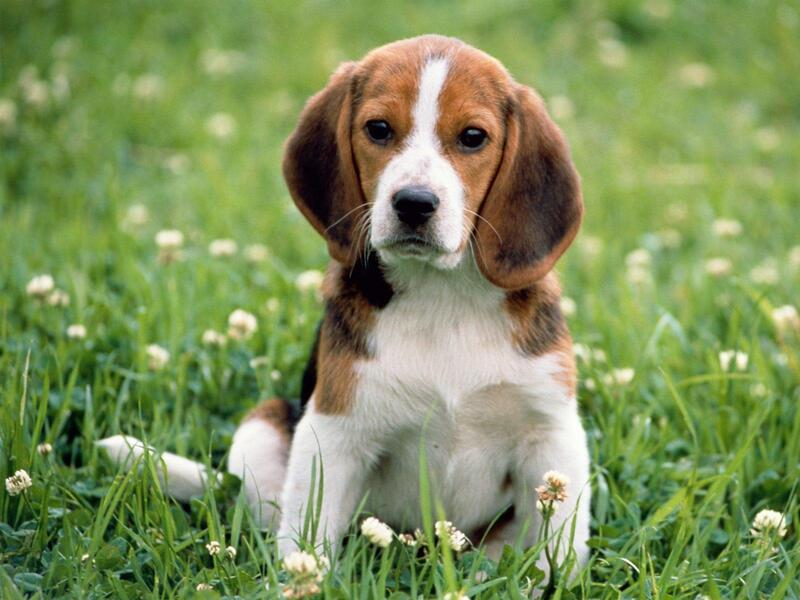

In [14]:
from PIL import Image
img = Image.open('example.jpg')
img

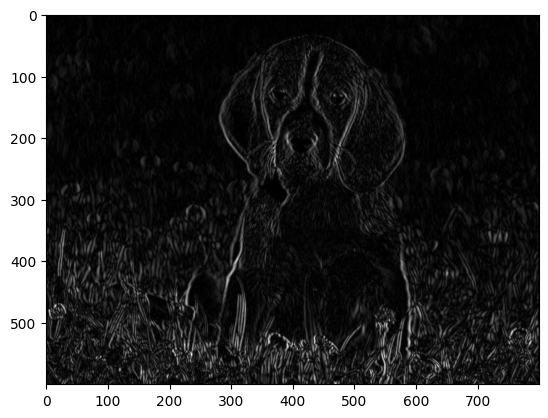

In [15]:
img_vert = sobel_filter(np.array(img), 'vertical')
plt.imshow(img_vert, cmap='gray')


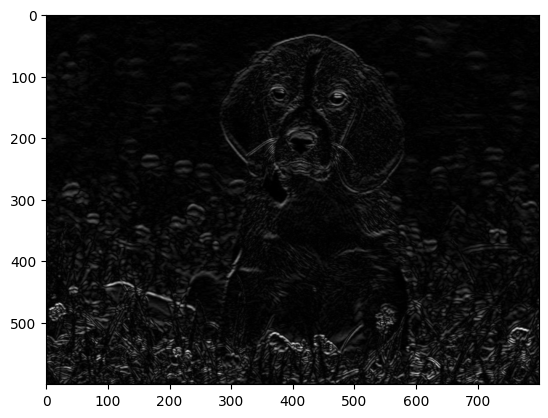

In [17]:
img_hor = sobel_filter(np.array(img), 'horizontal')
plt.imshow(img_hor, cmap='gray')

Как можно заменить, при вертикальной свертке более близкие к вертикальным линиии имеют более яркий цвет. И наоборот с горизонтальной сверткой.